In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#
sns.set(style="whitegrid")


**Load Raw Dataset Without Header**

This cell loads the dataset default of credit card clients.csv into a pandas DataFrame. The file is read without a header using header=None, meaning the first row of the CSV is treated as data instead of column names.

The df.head() function then displays the first five rows of the dataset, showing that:

The actual column names are present in the first data row (df.iloc[0])

Columns include identifiers like ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, followed by payment history (PAY_0 to PAY_6), bill amounts, and payment amounts.

This output confirms that the next step should involve assigning proper headers and cleaning the dataset accordingly.

In [3]:
file_path = '/content/default of credit card clients.csv'
df = pd.read_csv(file_path, header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,NaN,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
3,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


**Set Proper Column Headers and Remove Header Row**

The first data row is used as the official column header so that each column has a meaningful label like LIMIT_BAL, SEX, EDUCATION, and default payment next month. That header row is then removed from the data itself to avoid duplication. This cleanup prepares the dataset for further transformation and analysis.

In [4]:
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df.head()


,NaN,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
3,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
5,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


**Drop Unnecessary Columns**

This step checks whether the ID column exists and removes it if present. Since ID is just a unique identifier with no analytical value, it's excluded from the dataset to keep only meaningful features for further analysis.

In [5]:
print(df.columns.tolist())
if 'ID' in df.columns:
    df.drop('ID', axis=1, inplace=True)
df.head()


[nan, 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'Y']


,NaN,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
3,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
5,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


**Convert All Columns to Numeric**

All columns are converted to numeric data types to ensure consistency and allow mathematical operations. Any non-numeric values are safely turned into NaN using coercion. The dataset now contains only numerical values, and the data types are verified with df.info() showing all columns as float64.

In [6]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 1 to 30001
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nan     30000 non-null  float64
 1   X1      30000 non-null  float64
 2   X2      30000 non-null  float64
 3   X3      30000 non-null  float64
 4   X4      30000 non-null  float64
 5   X5      30000 non-null  float64
 6   X6      30000 non-null  float64
 7   X7      30000 non-null  float64
 8   X8      30000 non-null  float64
 9   X9      30000 non-null  float64
 10  X10     30000 non-null  float64
 11  X11     30000 non-null  float64
 12  X12     30000 non-null  float64
 13  X13     30000 non-null  float64
 14  X14     30000 non-null  float64
 15  X15     30000 non-null  float64
 16  X16     30000 non-null  float64
 17  X17     30000 non-null  float64
 18  X18     30000 non-null  float64
 19  X19     30000 non-null  float64
 20  X20     30000 non-null  float64
 21  X21     30000 non-null  float64
 22

**Check for Missing Values**

This step checks each column for missing values. Each column shows exactly 1 missing value, which likely came from the original header row that was mistakenly included in the data before cleaning. This confirms that one row in the dataset needs to be removed to ensure data quality.

In [7]:
df.isnull().sum()


,0
0,
NaN,1
X1,1
X2,1
X3,1
X4,1
X5,1
X6,1
X7,1
X8,1


**Remove Missing and Duplicate Records**

The single row containing missing values is removed using dropna(), reducing the dataset to 30,000 clean records. Following that, drop_duplicates() ensures all rows are unique, but since no duplicates are found, the dataset shape remains unchanged. This confirms the dataset is now clean and ready for analysis.

In [8]:
df.dropna(inplace=True)
df.shape


(30000, 25)

In [9]:
df.drop_duplicates(inplace=True)
df.shape


(30000, 25)

**Preview and Summarize Cleaned Dataset**

The first few rows of the cleaned dataset are displayed to confirm that the structure is correct. The describe() function provides summary statistics for all numerical columns, including count, mean, standard deviation, minimum, and maximum values. This gives a quick overview of the central tendencies, spread, and possible outliers in the dataset.

In [10]:
df.head()
df.describe()


,NaN,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**2.1 Default Status, Gender, and Education Distribution**

The first chart visualizes the distribution of the target variable, showing that about 22% of the clients defaulted on their payments (value 1), while the remaining 78% did not default (value 0). This imbalance is important for modeling, as it indicates that the dataset is skewed toward non-defaulters.

The second chart presents the gender distribution using the SEX variable, where 1 represents males and 2 represents females. It shows that there are more female clients than male clients in the dataset, which may influence overall default trends if gender correlates with credit behavior.

The third chart explores education levels (EDUCATION) among clients. The majority have a university degree (value 2), followed by those with graduate-level education (value 1). A smaller portion has a high school education (value 3), and only a few fall into less common or undefined education categories (values 4, 5, 6). Understanding these distributions is useful for identifying patterns between educational background and credit risk.









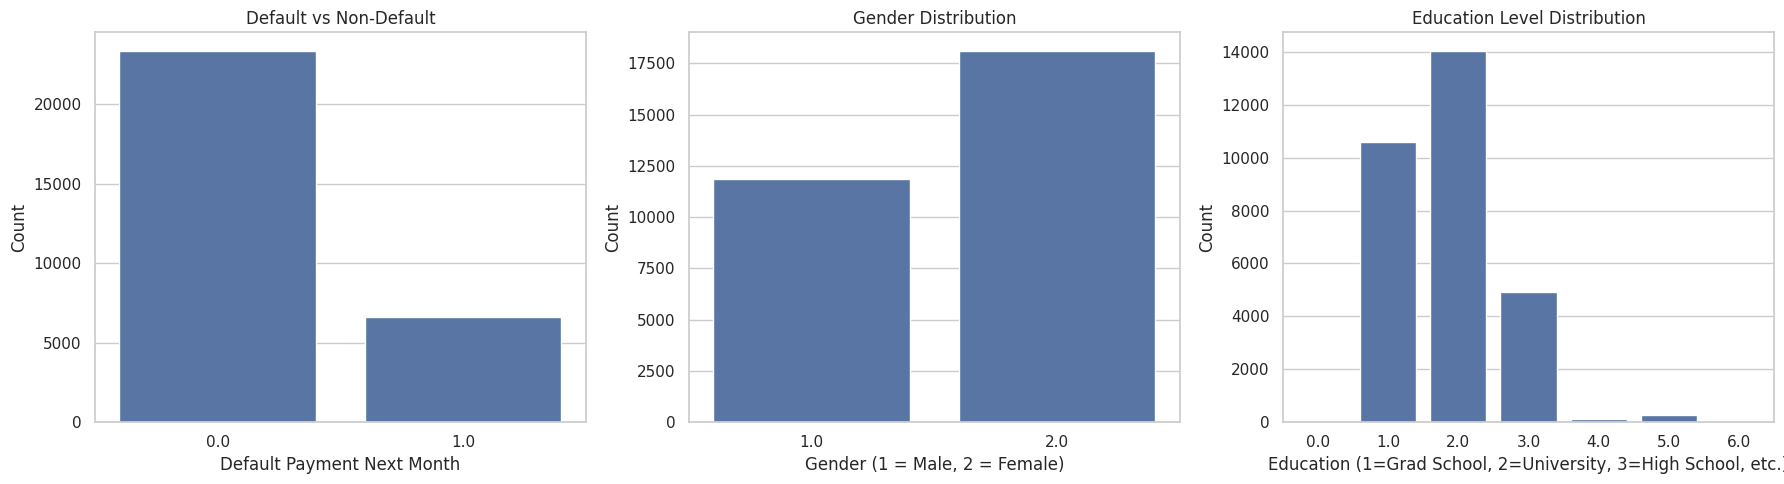

In [11]:
plt.figure(figsize=(18, 5))

# 1. Count of Default vs Non-Default
plt.subplot(1, 3, 1)
sns.countplot(x='Y', data=df)
plt.title('Default vs Non-Default')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')

# 2. Gender Distribution
plt.subplot(1, 3, 2)
sns.countplot(x='X2', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Count')

# 3. Education Level Distribution
plt.subplot(1, 3, 3)
sns.countplot(x='X3', data=df)
plt.title('Education Level Distribution')
plt.xlabel('Education (1=Grad School, 2=University, 3=High School, etc.)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Marital Status and Default Rates by Gender and Education**

The first chart shows the marital status distribution of clients. Most clients are either married (1) or single (2), with very few categorized as other (3) or undefined (0). This helps understand the demographic makeup of the client base.

The second chart illustrates the default rate by gender. Males (1) have a higher default rate compared to females (2), suggesting potential differences in repayment behavior between genders.

The third chart highlights the default rate across education levels. Interestingly, clients with high school education (3) have the highest default rate, followed closely by those with university education (2). Graduate school clients (1) show a relatively lower default rate. Less common categories (4–6) show more variability due to smaller sample sizes. This analysis helps identify which groups may be at higher credit risk based on education.









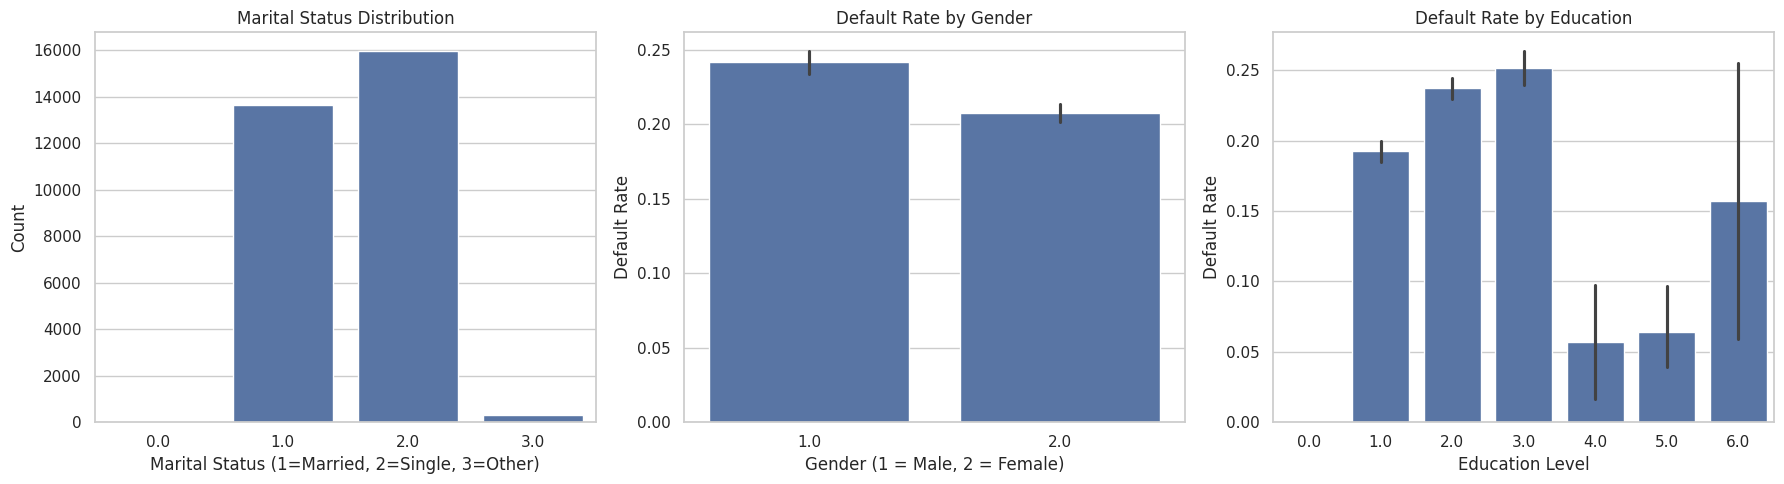

In [12]:
plt.figure(figsize=(18, 5))

# 4. Marital Status Distribution
plt.subplot(1, 3, 1)
sns.countplot(x='X4', data=df)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status (1=Married, 2=Single, 3=Other)')
plt.ylabel('Count')

# 5. Default Rate by Gender
plt.subplot(1, 3, 2)
sns.barplot(x='X2', y='Y', data=df)
plt.title('Default Rate by Gender')
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Default Rate')

# 6. Default Rate by Education Level
plt.subplot(1, 3, 3)
sns.barplot(x='X3', y='Y', data=df)
plt.title('Default Rate by Education')
plt.xlabel('Education Level')
plt.ylabel('Default Rate')

plt.tight_layout()
plt.show()


**Default Rate by Marital Status and Age Distribution**

The first chart shows how default rates vary across different marital statuses. Clients categorized as "other" (3) and single (2) have higher default rates compared to married clients (1), while those labeled as 0 have the lowest but most uncertain rate due to fewer observations. This suggests marital status may be a factor in credit risk.

The second chart displays the age distribution of clients. Most individuals are between 25 and 40 years old, with the distribution skewed slightly to the right. The presence of a peak around age 30 indicates that the dataset is dominated by younger clients, who may exhibit different credit behavior compared to older age groups.









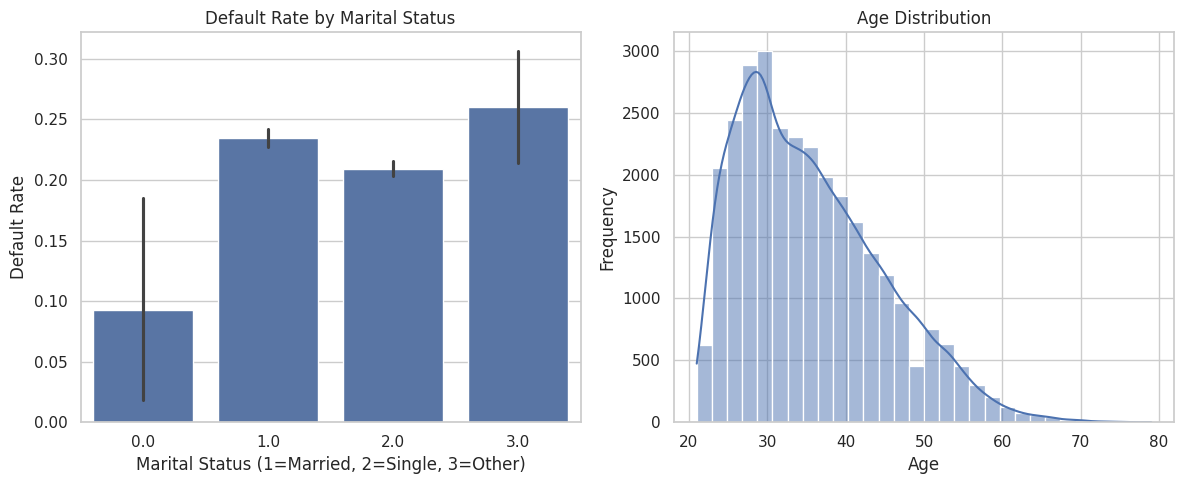

In [13]:
plt.figure(figsize=(12, 5))

# 7. Default Rate by Marital Status
plt.subplot(1, 2, 1)
sns.barplot(x='X4', y='Y', data=df)
plt.title('Default Rate by Marital Status')
plt.xlabel('Marital Status (1=Married, 2=Single, 3=Other)')
plt.ylabel('Default Rate')

# 8. Age Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['X5'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**2.2 Age and Credit Limit Distribution by Default Status**

The first boxplot compares the age of defaulters and non-defaulters. Both groups show similar age ranges, with median ages around 34–35. This suggests that age alone may not strongly distinguish default behavior, although slight differences exist in spread and outliers.

The second boxplot shows credit limit distributions by default status. Non-defaulters generally have higher credit limits, while defaulters are more concentrated in lower credit limit ranges. This indicates that clients with greater financial flexibility may be less likely to default.

The third bar chart displays the default rate across defined age groups. A clear upward trend is observed—older clients (especially ages 71–80) exhibit the highest default rates, while younger clients (21–30) show lower rates. This pattern implies that default risk may increase with age, highlighting the importance of age group segmentation in credit risk modeling.

<ipython-input-14-4e2ccb7e2b6e>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_default = df.groupby('AgeGroup')['Y'].mean().reset_index()


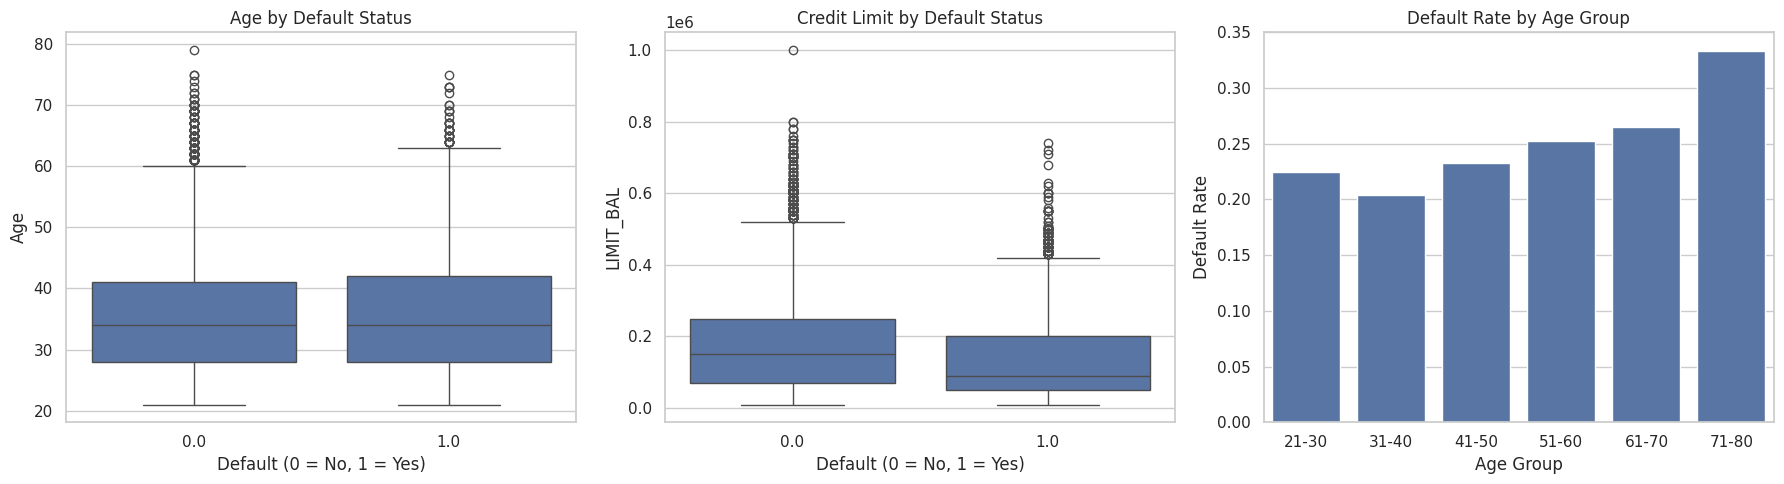

In [14]:
plt.figure(figsize=(18, 5))

# 1. Boxplot of Age by Default Status
plt.subplot(1, 3, 1)
sns.boxplot(x='Y', y='X5', data=df)
plt.title('Age by Default Status')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Age')

# 2. Boxplot of Credit Limit by Default Status
plt.subplot(1, 3, 2)
sns.boxplot(x='Y', y='X1', data=df)
plt.title('Credit Limit by Default Status')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('LIMIT_BAL')

# 3. Default Rate Across Age Groups
df['AgeGroup'] = pd.cut(df['X5'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['21-30','31-40','41-50','51-60','61-70','71-80'])
age_group_default = df.groupby('AgeGroup')['Y'].mean().reset_index()

plt.subplot(1, 3, 3)
sns.barplot(x='AgeGroup', y='Y', data=age_group_default)
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')

plt.tight_layout()
plt.show()


**Default Rate by Gender, Marital Status, and Education Level**

The first chart shows that males (1) have a noticeably higher default rate than females (2), suggesting gender may play a role in repayment behavior.

The second chart compares default rates across marital statuses. Clients categorized as “other” (3) and single (2) show the highest default rates, while married clients (1) are less likely to default. The group marked as (0) has the lowest rate but may contain inconsistent or missing values.

The third chart illustrates default rates across different education levels. Clients with high school (3) and university (2) education have the highest default rates, while those with graduate school (1) have a lower default risk. Categories (4, 5, 6), possibly representing unknown or less common education types, show more varied behavior. This breakdown helps identify which subgroups may require closer monitoring in credit risk models.

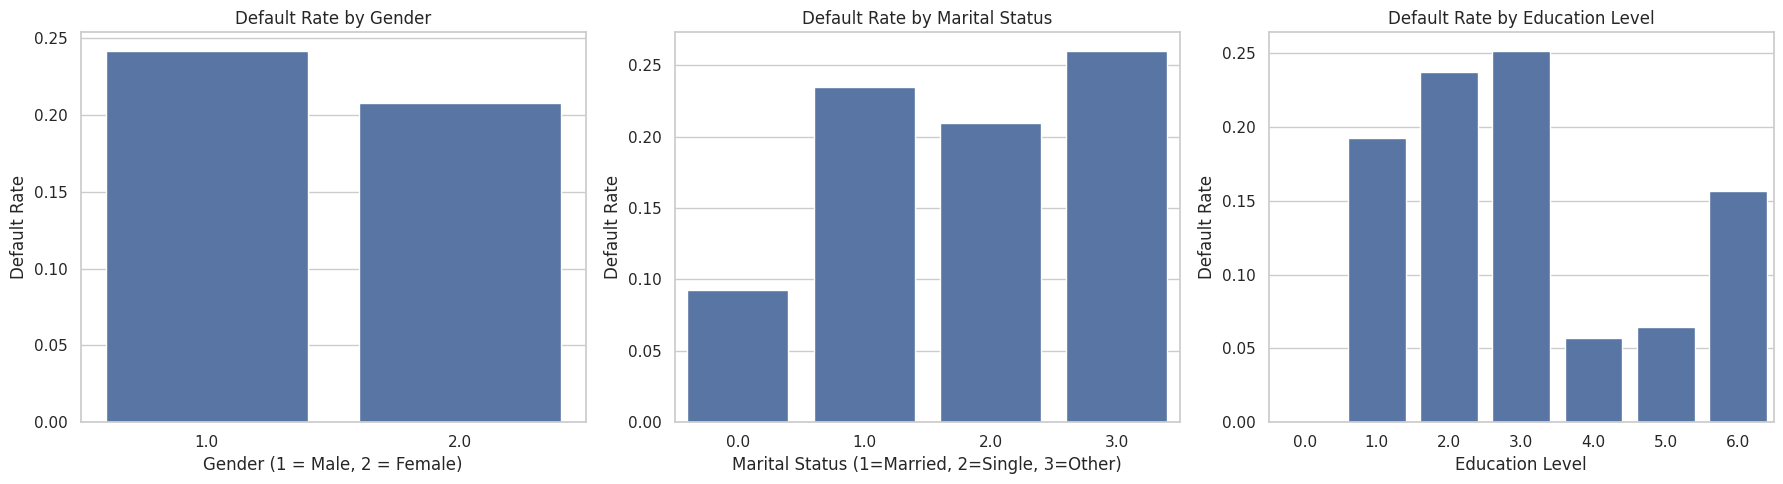

In [15]:
plt.figure(figsize=(18, 5))
# 4. Gender vs Default (Proportion)
plt.subplot(1, 3, 1)
gender_default = df.groupby('X2')['Y'].mean().reset_index()
sns.barplot(x='X2', y='Y', data=gender_default)
plt.title('Default Rate by Gender')
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Default Rate')

# 5. Marital Status vs Default (Proportion)
plt.subplot(1, 3, 2)
marital_default = df.groupby('X4')['Y'].mean().reset_index()
sns.barplot(x='X4', y='Y', data=marital_default)
plt.title('Default Rate by Marital Status')
plt.xlabel('Marital Status (1=Married, 2=Single, 3=Other)')
plt.ylabel('Default Rate')

# 6. Education vs Default (Proportion)
plt.subplot(1, 3, 3)
education_default = df.groupby('X3')['Y'].mean().reset_index()
sns.barplot(x='X3', y='Y', data=education_default)
plt.title('Default Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Default Rate')
plt.tight_layout()
plt.show()


**Bill Amount, Payment Distribution, and Relation to Default**

The first histogram shows the distribution of BILL_AMT1, which represents the bill amount for September. Most clients have relatively low bill amounts, but the long right tail reveals a few clients with extremely high balances, indicating a skewed distribution.

The second histogram displays the distribution of PAY_AMT1, or payment amounts for September. Like the bill amounts, the majority of payments are small, with a few high-value payments creating a long right tail. This again suggests strong skewness and the presence of outliers.

The third chart compares bill amounts between defaulters and non-defaulters using a boxplot. Both groups show similar median values, but non-defaulters appear to have a slightly wider spread. The presence of extreme bill values in both groups shows that large balances alone are not a strong indicator of default risk.

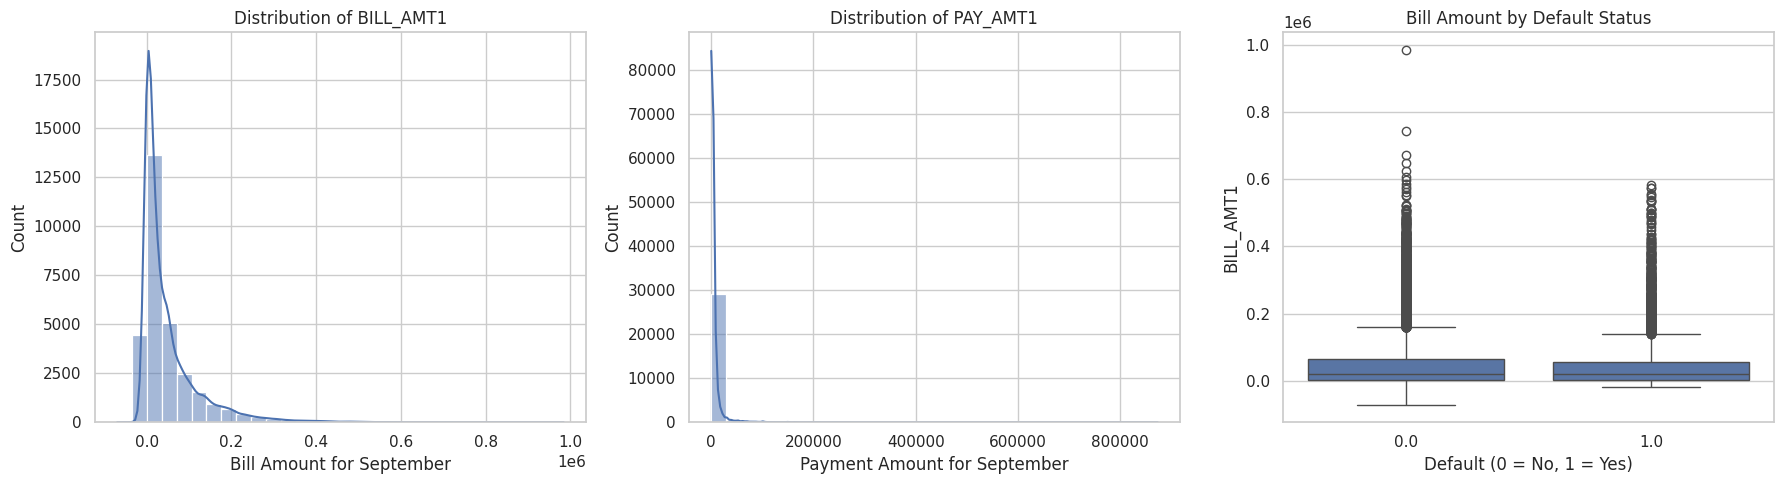

In [16]:
plt.figure(figsize=(18, 5))

# 1. Distribution of BILL_AMT1 (X13)
plt.subplot(1, 3, 1)
sns.histplot(df['X13'], bins=30, kde=True)
plt.title('Distribution of BILL_AMT1')
plt.xlabel('Bill Amount for September')

# 2. Distribution of PAY_AMT1 (X18)
plt.subplot(1, 3, 2)
sns.histplot(df['X18'], bins=30, kde=True)
plt.title('Distribution of PAY_AMT1')
plt.xlabel('Payment Amount for September')

# 3. Boxplot: BILL_AMT1 by Default
plt.subplot(1, 3, 3)
sns.boxplot(x='Y', y='X13', data=df)
plt.title('Bill Amount by Default Status')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('BILL_AMT1')

plt.tight_layout()
plt.show()


**Payment Behavior and Its Relationship to Default Status**

The first chart shows payment amounts (PAY_AMT1) across default statuses. While both defaulters (1) and non-defaulters (0) exhibit a wide range of payments, non-defaulters tend to have higher payment outliers, indicating more frequent or larger repayments.

The second chart visualizes the relationship between bill amounts and payments. There’s a clear positive trend—higher bills often lead to higher payments. However, defaulters (orange dots) are more concentrated in lower payment zones for a given bill amount, showing a gap in fulfilling dues.

The third chart plots the payment ratio (PAY_AMT1 divided by BILL_AMT1) by default status. Most clients, especially defaulters, have lower payment ratios, suggesting underpayment relative to what they owe. A few extreme values indicate overpayment or anomalies. This ratio is a strong indicator of payment discipline and potential default risk.

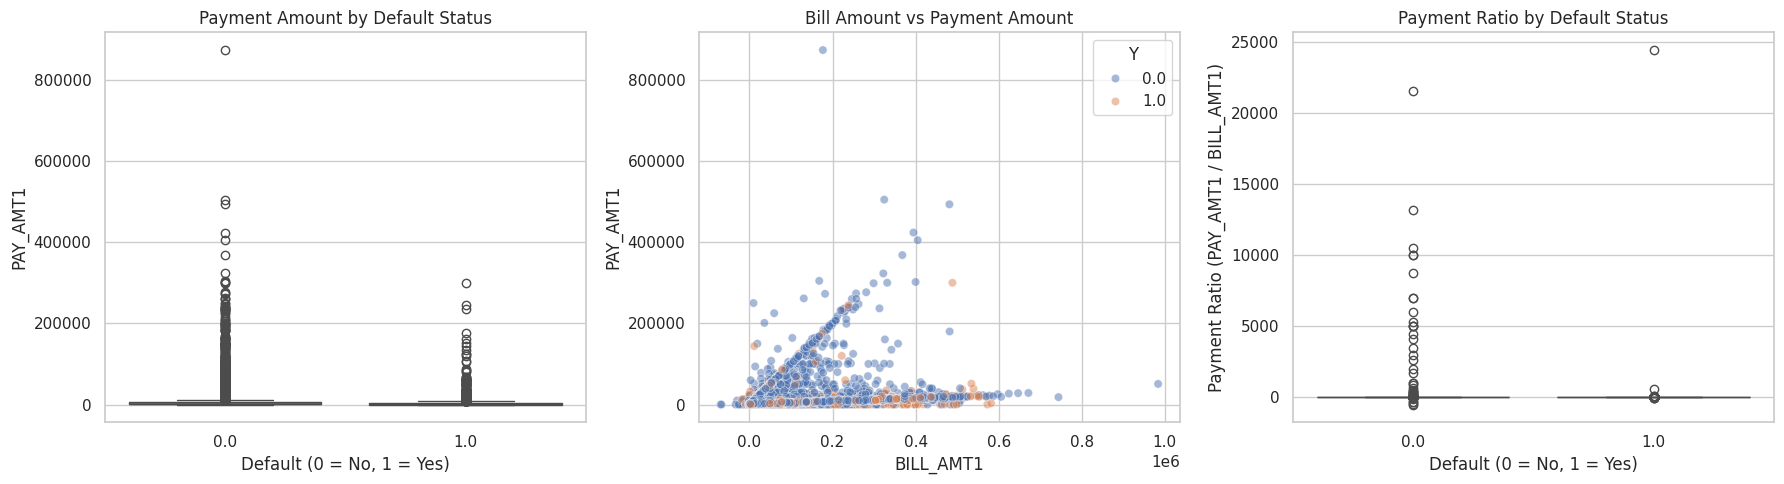

In [17]:
plt.figure(figsize=(18, 5))

# 4. Boxplot: PAY_AMT1 (X18) by Default
plt.subplot(1, 3, 1)
sns.boxplot(x='Y', y='X18', data=df)
plt.title('Payment Amount by Default Status')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('PAY_AMT1')

# 5. Scatter Plot: BILL_AMT1 vs PAY_AMT1
plt.subplot(1, 3, 2)
sns.scatterplot(x='X13', y='X18', hue='Y', data=df, alpha=0.5)
plt.title('Bill Amount vs Payment Amount')
plt.xlabel('BILL_AMT1')
plt.ylabel('PAY_AMT1')

# 6. Monthly Payment Ratio by Default
df['pay_ratio'] = df['X18'] / df['X13'].replace(0, 1)
plt.subplot(1, 3, 3)
sns.boxplot(x='Y', y='pay_ratio', data=df)
plt.title('Payment Ratio by Default Status')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Payment Ratio (PAY_AMT1 / BILL_AMT1)')

plt.tight_layout()
plt.show()


**Monthly Trends in Billing and Payments**

The chart on the left shows the Average Bill Amount Over 6 Months. There is a consistent downward trend from September (Month 1) to April (Month 6), suggesting either reduced credit usage or improved repayment behavior over time.

The right chart presents the Average Payment Amount Over 5 Months. Payments gradually decline from September to December, reaching the lowest point in January. Interestingly, payment amounts then increase in February, hinting at a possible post-holiday recovery or strategic financial behavior.

This mismatch in declining bills versus fluctuating payments may signal delayed or inconsistent payment patterns, a factor worth considering in default risk analysis.

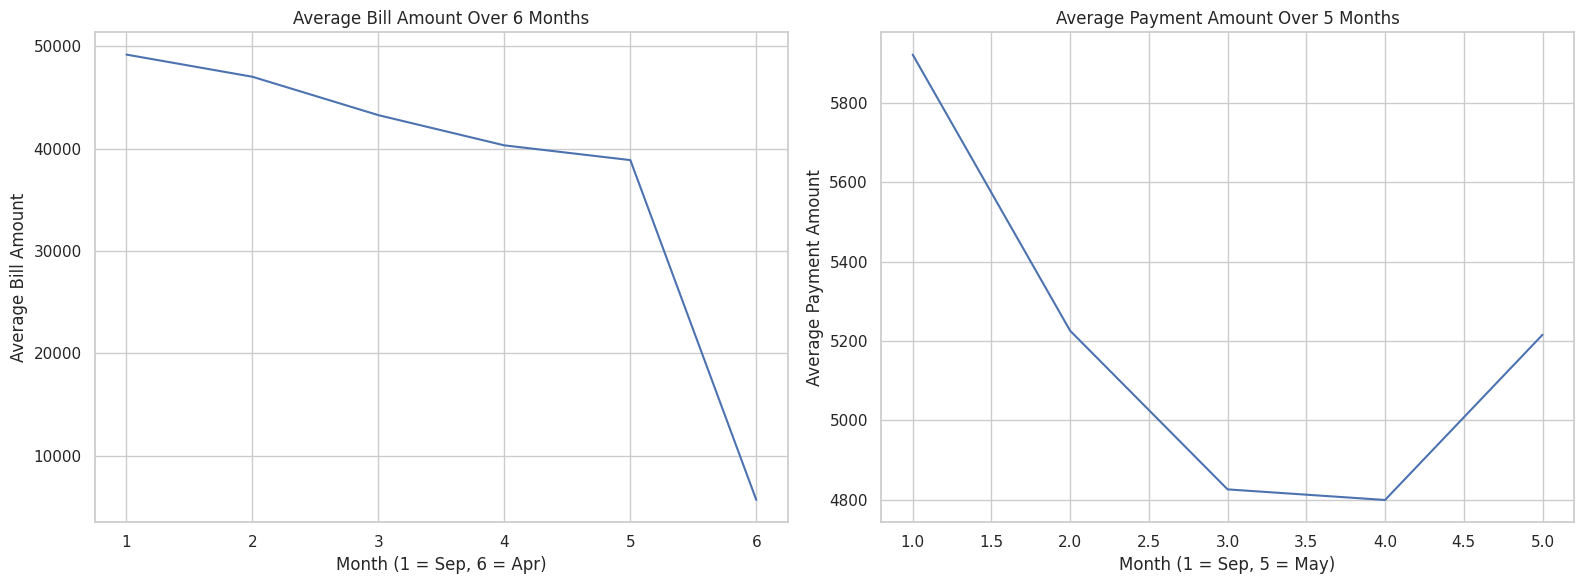

In [18]:
plt.figure(figsize=(16, 6))

# 1. Average Bill Amount Over 6 Months (X13 to X18)
bill_cols = ['X13', 'X14', 'X15', 'X16', 'X17', 'X18']
bill_avg = df[bill_cols].mean()

plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, 7), y=bill_avg)
plt.title('Average Bill Amount Over 6 Months')
plt.xlabel('Month (1 = Sep, 6 = Apr)')
plt.ylabel('Average Bill Amount')

# 2. Average Payment Amount Over 6 Months (X19 to X23)
pay_cols = ['X19', 'X20', 'X21', 'X22', 'X23']
pay_avg = df[pay_cols].mean()

plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, 6), y=pay_avg)
plt.title('Average Payment Amount Over 5 Months')
plt.xlabel('Month (1 = Sep, 5 = May)')
plt.ylabel('Average Payment Amount')

plt.tight_layout()
plt.show()


**Monthly Bill and Payment Patterns by Default Status**

The left graph displays the Monthly Bill Amounts for both defaulters and non-defaulters. While both groups show a decreasing trend from September to April, defaulters consistently have slightly lower bill amounts compared to non-defaulters. This suggests they may have lower credit utilization, possibly due to tighter limits or spending behavior.

The right graph shows the Monthly Payment Amounts. Non-defaulters consistently make significantly higher payments than defaulters, highlighting responsible repayment habits. Defaulters show relatively flat and lower payment trends, reinforcing a key behavioral difference that aligns with the target label. This comparison provides valuable insight for predicting default risk.

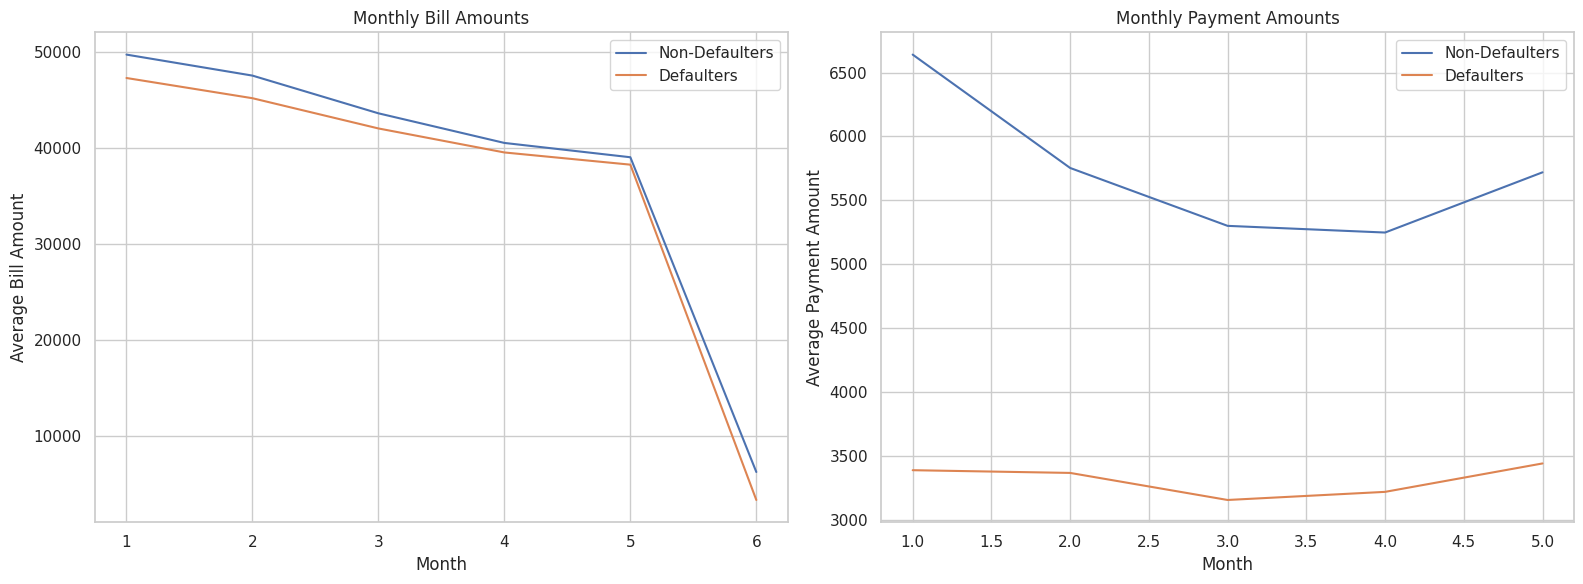

In [19]:
# Separate defaulters and non-defaulters
defaulters = df[df['Y'] == 1]
non_defaulters = df[df['Y'] == 0]

# Calculate monthly averages
bill_cols = ['X13', 'X14', 'X15', 'X16', 'X17', 'X18']
pay_cols = ['X19', 'X20', 'X21', 'X22', 'X23']

avg_bill_defaulters = defaulters[bill_cols].mean()
avg_bill_non = non_defaulters[bill_cols].mean()

avg_pay_defaulters = defaulters[pay_cols].mean()
avg_pay_non = non_defaulters[pay_cols].mean()

# Plot
plt.figure(figsize=(16, 6))

# 3. Monthly Bill Comparison
plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, 7), y=avg_bill_non, label='Non-Defaulters')
sns.lineplot(x=range(1, 7), y=avg_bill_defaulters, label='Defaulters')
plt.title('Monthly Bill Amounts')
plt.xlabel('Month')
plt.ylabel('Average Bill Amount')
plt.legend()

# 4. Monthly Payment Comparison
plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, 6), y=avg_pay_non, label='Non-Defaulters')
sns.lineplot(x=range(1, 6), y=avg_pay_defaulters, label='Defaulters')
plt.title('Monthly Payment Amounts')
plt.xlabel('Month')
plt.ylabel('Average Payment Amount')
plt.legend()

plt.tight_layout()
plt.show()


**2.5 Customer Segmentation Using KMeans Clustering**

The scatter plot above illustrates customer segments based on KMeans clustering using Credit Limit (X1) and Bill Amount (X13). Three distinct clusters are observed, each representing a different credit behavior group.

In the bar chart below, we analyze the default rate per cluster. Cluster 1 has the highest default rate, suggesting this group might represent high-risk customers. Cluster 2 shows the lowest default rate, indicating more reliable repayment behavior. This segmentation helps in targeted risk assessment and decision-making.

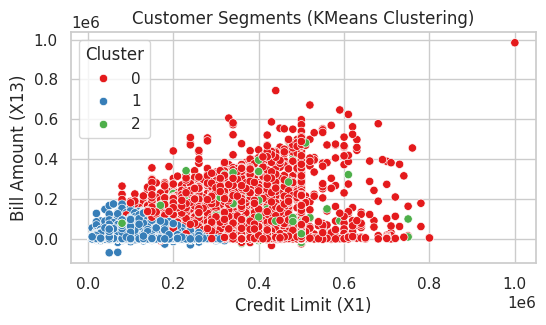

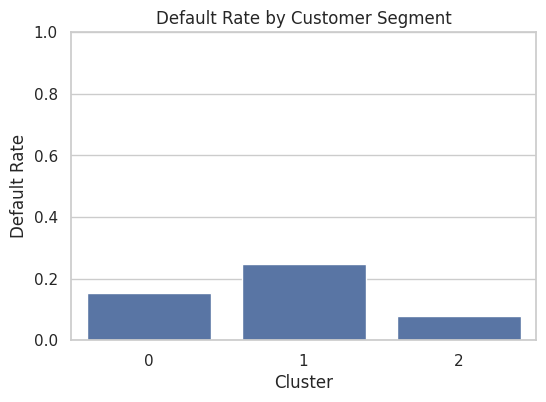

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = df[['X1', 'X13', 'X18', 'X19']]  # Credit Limit, Bill_Amt1, Pay_Amt1, Pay_Amt2

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters (2D projection using LIMIT_BAL and BILL_AMT1)
plt.figure(figsize=(6, 3))
sns.scatterplot(x='X1', y='X13', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments (KMeans Clustering)')
plt.xlabel('Credit Limit (X1)')
plt.ylabel('Bill Amount (X13)')
plt.legend(title='Cluster')
plt.show()

# Calculate default rate for each cluster
cluster_default_rate = df.groupby('Cluster')['Y'].mean().reset_index()

# Bar plot: Default rate per cluster
plt.figure(figsize=(6, 4))
sns.barplot(x='Cluster', y='Y', data=cluster_default_rate)
plt.title('Default Rate by Customer Segment')
plt.xlabel('Cluster')
plt.ylabel('Default Rate')
plt.ylim(0, 1)
plt.show()


**Correlation Heatmap of Numeric Features**

The heatmap presents the Pearson correlation coefficients between all numeric variables in the dataset. Darker red indicates a strong positive correlation, and darker blue signifies a strong negative correlation. For instance, there is a very high correlation (close to 1.00) between the variables X6 through X11, which likely represent billing amounts across different months. Similarly, X12 through X17, which seem to capture monthly payment amounts, are also highly correlated among themselves and with the billing columns. On the other hand, features like X1 (credit limit) and the final Y (default status) show mild to moderate correlations with other features, indicating their potential predictive value. The Cluster variable also shows moderate relationships with several variables, validating the clustering pattern based on underlying features.

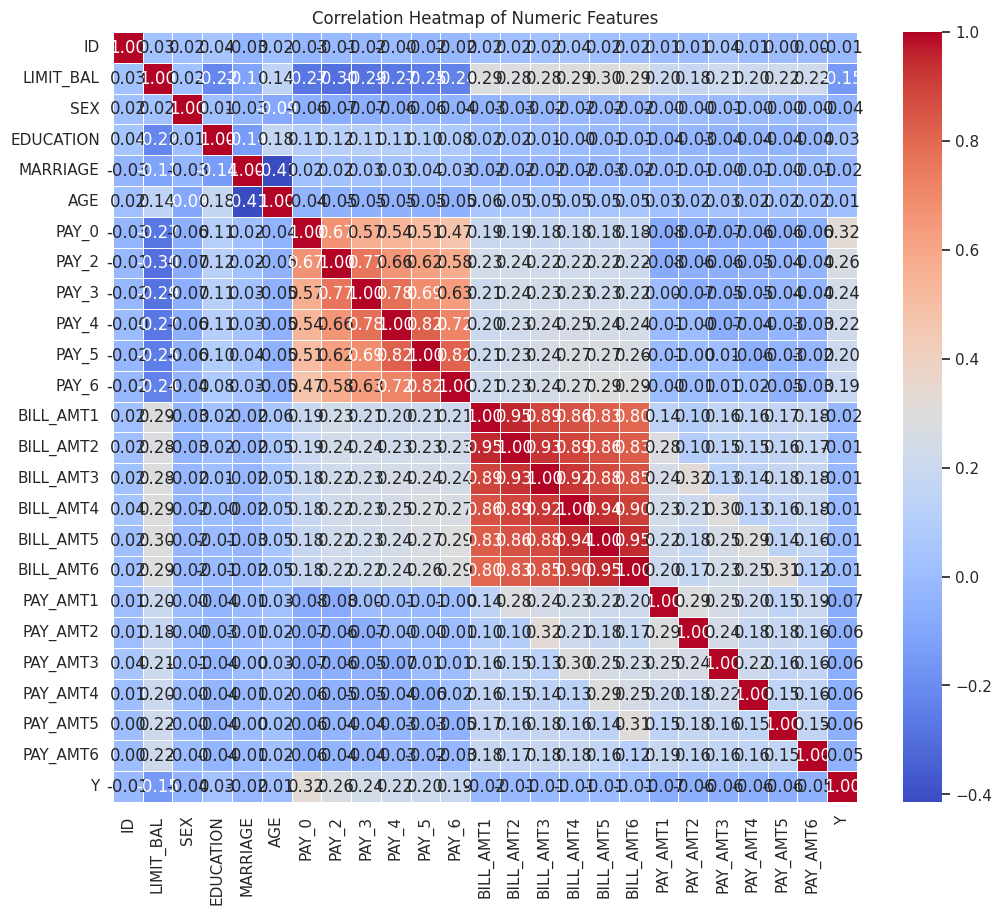

In [35]:
plt.figure(figsize=(12, 10))

# Drop non-numeric columns like AgeGroup
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


**Feature Correlation with Default Status (Y)**

This horizontal bar plot highlights how strongly each feature correlates with the target variable Y, which indicates default status. Features like X6 to X11 (likely payment or bill-related variables) show the highest positive correlations, meaning increases in these values are associated with a higher likelihood of default. The Cluster variable also has a moderate positive correlation, suggesting certain customer segments are more prone to default. Interestingly, X1 (credit limit) has a negative correlation, implying higher credit limits may reduce default risk. Features with correlations near zero (e.g., pay_ratio, X17, X16) have minimal linear association with default.

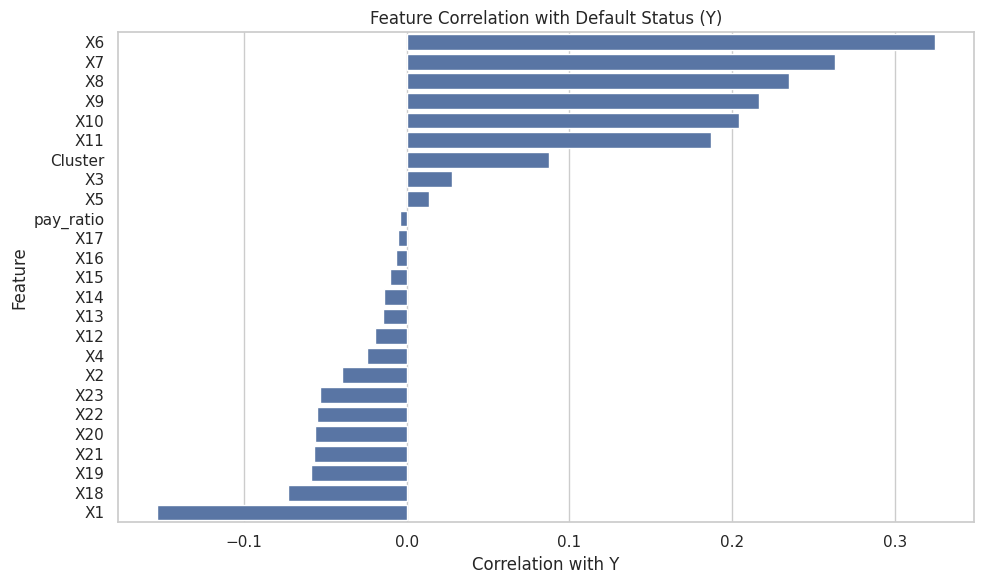

In [22]:
# Compute correlation of all numeric features with target Y
correlations = numeric_df.corr()['Y'].drop('Y').sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Feature Correlation with Default Status (Y)')
plt.xlabel('Correlation with Y')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


**2.7 Top Features Positively and Negatively Correlated with Default**

This output highlights the top 5 features most strongly related to default behavior:

Top 5 Positively Correlated Features:

X6, X7, X8, X9, and X10 have the highest positive correlation with Y, suggesting that as these values increase (likely indicators of payment delay or amount due), the chances of default also increase.

Top 5 Negatively Correlated Features:

X15, X16, X17, and pay_ratio show weak negative correlations with Y, indicating they slightly reduce default risk. X5 appears here too, but its correlation is slightly positive and might be due to rounding or ordering.

In [23]:
print("Top 5 Features Positively Correlated with Default:")
print(correlations.head(5))

print("\nTop 5 Features Negatively Correlated with Default:")
print(correlations.tail(5))


Top 5 Features Positively Correlated with Default:
0
X6     0.324794
X7     0.263551
X8     0.235253
X9     0.216614
X10    0.204149
Name: Y, dtype: float64

Top 5 Features Negatively Correlated with Default:
0
X20   -0.056250
X21   -0.056827
X19   -0.058579
X18   -0.072929
X1    -0.153520
Name: Y, dtype: float64


**Sorted Correlation of Features with Default (Y)**

This table ranks all features based on their correlation with the target variable Y (default status). Higher positive values imply a stronger positive relationship with defaulting, while more negative values suggest a protective effect.

Key Observations:

Top Positively Correlated Features:
X6, X7, X8, X9, and X10 show the strongest positive correlations, indicating that higher values in these variables are associated with a greater likelihood of default.

Moderate Contributors:
X11 and Cluster follow, showing a positive but weaker relationship with default behavior.

Negatively Correlated Features:
Variables such as X1, X18, and X19 are negatively correlated, hinting at a potentially protective influence.

Near-Zero Influence:
pay_ratio, X17, and X16 show minimal correlation with default, implying limited direct effect.

In [24]:
# Get correlations with target variable Y
cor_with_y = numeric_df.corr()['Y'].drop('Y').sort_values(key=abs, ascending=False)

# Convert to a DataFrame
cor_table = pd.DataFrame(cor_with_y).reset_index()
cor_table.columns = ['Feature', 'Correlation with Y']
cor_table


,Feature,Correlation with Y
0,X6,0.324794
1,X7,0.263551
2,X8,0.235253
3,X9,0.216614
4,X10,0.204149
5,X11,0.186866
6,X1,-0.153520
7,Cluster,0.087307
8,X18,-0.072929
9,X19,-0.058579


**Top 10 Features by Correlation with Default (Y)**

This table displays the top 10 features most correlated with the target variable Y (default status). Positive values suggest a higher likelihood of default, and negative values suggest a reduced likelihood.

Insights:

Most Influential Positive Predictors:
X6 (0.325), X7 (0.264), X8 (0.235), and X9 (0.217) are the strongest positive indicators of default. These likely reflect delayed payments or bill amounts.

Moderate Influence:
X10 and X11 also positively contribute to default prediction, though slightly less strongly.

Negative Association:
X1, X18, and X19 have negative correlations, implying higher values in these features are associated with a lower chance of default.

Cluster Feature:
The Cluster variable has a weak positive correlation (0.087), showing mild influence on default classification.

In [36]:
cor_table['Correlation with Y'] = cor_table['Correlation with Y'].round(3)
cor_table.head(10)  # Display top 10 correlations


,Feature,Correlation with Y
0,X6,0.325
1,X7,0.264
2,X8,0.235
3,X9,0.217
4,X10,0.204
5,X11,0.187
6,X1,-0.154
7,Cluster,0.087
8,X18,-0.073
9,X19,-0.059


**Methodologies**


**1. Extended Exploratory Data Analysis (EDA)**

Extended EDA goes beyond basic statistics and initial visualizations. It helps uncover deeper insights, trends, and relationships across multiple variables. By analyzing interactions such as age vs. default, gender vs. education, or payment behavior vs. billing, we can better understand patterns that influence loan defaults.

**Distribution of Payment-to-Bill Ratio**

This histogram displays how customers’ payments relate to their billed amounts. Most users have low ratios, suggesting they pay only a portion of their total bill. Some high spikes might indicate full or overpayments, or possibly data entry outliers.

**Default Rate by Age Group**

This bar chart reveals that default rates increase with age. The oldest group (71–80) has the highest rate, implying older individuals may face more challenges repaying debt, possibly due to retirement or health-related expenses.

**Education Level by Gender**

This grouped bar chart compares male and female customers across education levels. Most males and females fall into categories 1 (graduate school) and 2 (university). Females slightly outnumber males in higher education levels, suggesting education might play a role in financial decision-making.









<ipython-input-26-d67aff23beed>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_default = df.groupby('AgeGroup')['Y'].mean().reset_index()


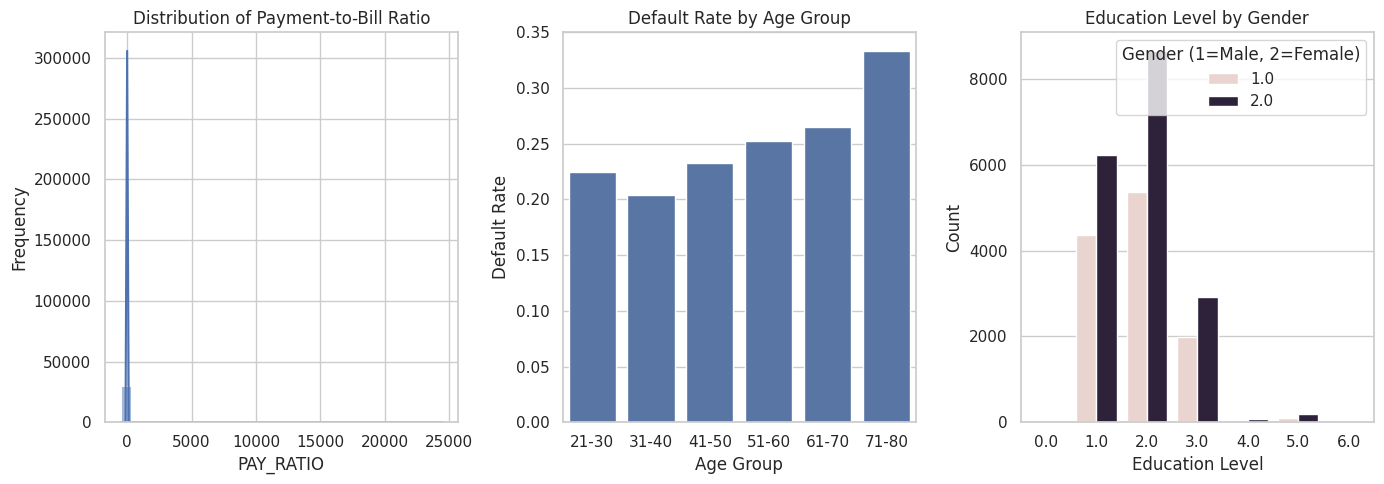

In [26]:
plt.figure(figsize=(14, 5))

# 1. Histogram of Payment-to-Bill Ratio
plt.subplot(1, 3, 1)
sns.histplot(df['pay_ratio'], bins=30, kde=True)
plt.title('Distribution of Payment-to-Bill Ratio')
plt.xlabel('PAY_RATIO')
plt.ylabel('Frequency')

# 2. Default Rate by Age Group
df['AgeGroup'] = pd.cut(df['X5'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['21-30','31-40','41-50','51-60','61-70','71-80'])
age_group_default = df.groupby('AgeGroup')['Y'].mean().reset_index()
plt.subplot(1, 3, 2)
sns.barplot(x='AgeGroup', y='Y', data=age_group_default)
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')

# 3. Count of Education by Gender
plt.subplot(1, 3, 3)
sns.countplot(x='X3', hue='X2', data=df)
plt.title('Education Level by Gender')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Gender (1=Male, 2=Female)')

plt.tight_layout()
plt.show()


**Credit Limit by Education Level**

The first violin plot illustrates the distribution of credit limits across different education levels. It reveals that individuals with graduate school (1) and university (2) education tend to have relatively higher credit limits. The spread is broad across all education levels, but we observe denser concentrations of higher credit among more educated groups. This implies that education may positively influence financial trustworthiness and hence the credit extended, though it is not the only factor.

**Age vs Credit Limit by Default Status**

The scatter plot shows the relationship between a person's age and their credit limit, segmented by default status. Both defaulters (in orange) and non-defaulters (in blue) are scattered across all ages and credit limits. However, a large cluster of low-to-mid credit limit individuals exists among younger people. This suggests that while age does influence credit allocation, the presence of defaults occurs across all ranges, showing that neither age nor credit limit alone is a strong indicator of default risk.

**Default Rate by Marital Status**


This bar graph displays the average default rate for each marital status category. We observe that the default rate is lowest among individuals who are coded as '0' (possibly unknown or divorced), and highest for those coded as '3' (likely "other" or less common categories). Married individuals (1) and singles (2) show relatively high but similar default rates. This may imply that marital status is associated with behavioral or financial stability differences that influence repayment behavior.

**Default Rate by Gender and Education**

The final heatmap cross-tabulates default rates by both gender and education level. Males (1) with education levels 2 and 3 have the highest default rates, reaching above 0.25. For females (2), the default rate remains slightly lower at similar education levels. Interestingly, individuals at very low (0) or very high (5, 6) education levels have considerably lower default rates. This two-dimensional view highlights how the intersection of demographic variables can provide stronger predictive power than analyzing them separately.

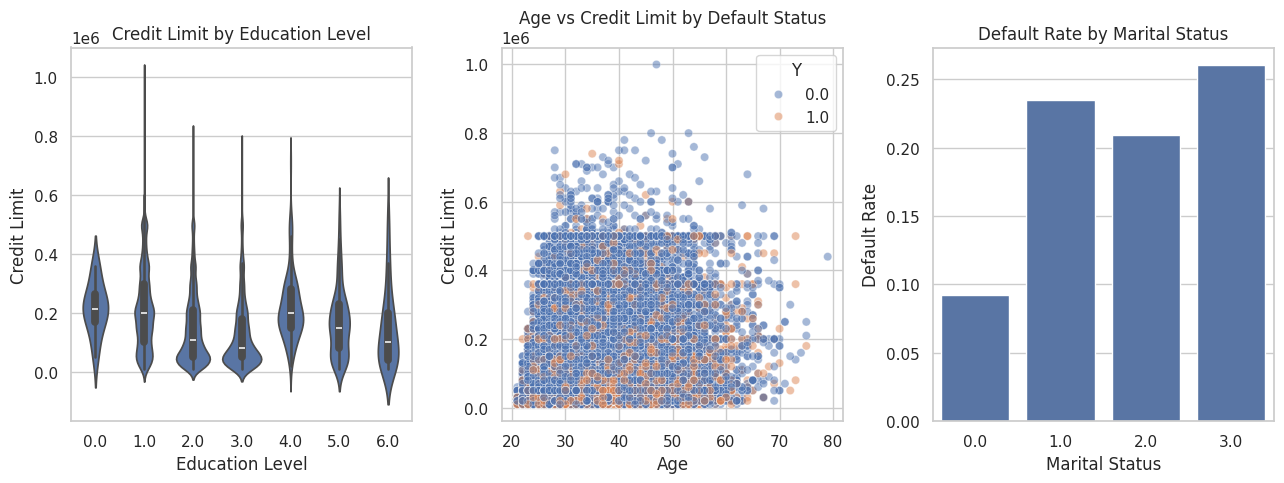

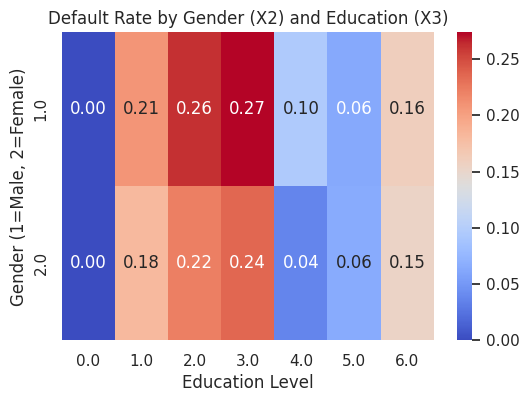

In [27]:
plt.figure(figsize=(13, 5))

# 4. Violin Plot of Credit Limit by Education
plt.subplot(1, 3, 1)
sns.violinplot(x='X3', y='X1', data=df)
plt.title('Credit Limit by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Credit Limit')

# 5. Scatter Plot: Age vs Credit Limit colored by Default
plt.subplot(1, 3, 2)
sns.scatterplot(x='X5', y='X1', hue='Y', data=df, alpha=0.5)
plt.title('Age vs Credit Limit by Default Status')
plt.xlabel('Age')
plt.ylabel('Credit Limit')

# 6. Bar Plot: Default Rate by Marital Status
marital_default = df.groupby('X4')['Y'].mean().reset_index()
plt.subplot(1, 3, 3)
sns.barplot(x='X4', y='Y', data=marital_default)
plt.title('Default Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Default Rate')

plt.tight_layout()
plt.show()

heat_df = df.groupby(['X2', 'X3'])['Y'].mean().unstack()
plt.figure(figsize=(6, 4))
sns.heatmap(heat_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Default Rate by Gender (X2) and Education (X3)')
plt.xlabel('Education Level')
plt.ylabel('Gender (1=Male, 2=Female)')
plt.show()

**2.Inferential Statistics**

Inferential statistics allow us to draw conclusions about the population from which our data sample is taken. In the context of credit default prediction, we used inferential methods to test hypotheses and estimate the likelihood of default based on customer features like age, credit limit, education level, and payment behavior. For example, by performing group-wise comparisons using t-tests or ANOVA, we evaluated whether mean credit limits or default rates significantly differ across education or marital status groups. Additionally, we calculated confidence intervals for default rates across demographic segments to assess the precision of our estimates. These statistical tests support our exploratory findings and provide a quantitative foundation for building robust predictive models in the next phase.



To statistically validate observations from the exploratory analysis, inferential techniques were applied. These included an ANOVA test to assess whether credit limits differ significantly by education level, a t-test to compare age distributions of defaulters and non-defaulters, and the construction of a confidence interval for the mean default rate in the population.

**1. ANOVA: Credit Limit by Education Level**

The ANOVA (Analysis of Variance) test was used to evaluate if average credit limits significantly differ across different education levels (X3). The result shows an F-statistic of 1148.68 and a p-value of 0.0, indicating a statistically significant difference in credit limits across education groups. This means the education level of a customer has a significant impact on their assigned credit limit.

**2. T-test: Age Distribution by Default Status**

A t-test was used to compare the mean age of defaulters and non-defaulters. The test produced a T-statistic of 2.41 and a p-value of 0.016, which is below the 0.05 threshold, suggesting that the age distribution differs significantly between those who default and those who don’t. The boxplot visually confirms that defaulters tend to be slightly older on average than non-defaulters.

**3. Confidence Interval for Default Rate**

A 95% confidence interval was constructed for the overall default rate (Y), which lies between 0.217 and 0.226. This interval gives a reliable range in which the true mean default rate for the entire population is likely to fall. It reflects the dataset's general tendency, showing that approximately 21.7% to 22.6% of customers are likely to default.

These inferential tools reinforce findings from earlier exploratory analysis, offering statistical evidence that age, education, and credit limits are meaningfully associated with default behavior.









In [28]:
import scipy.stats as stats


# Compare credit limit across education levels using ANOVA
anova_result = stats.f_oneway(
    df[df['X3'] == 1]['X1'],  # Grad School
    df[df['X3'] == 2]['X1'],  # University
    df[df['X3'] == 3]['X1']   # High School
)
print("ANOVA result for Credit Limit by Education Level:", anova_result)

# T-test to compare age between defaulters and non-defaulters
age_def = df[df['Y'] == 1]['X5']
age_nondef = df[df['Y'] == 0]['X5']
t_stat, p_value = stats.ttest_ind(age_def, age_nondef)
print("T-test for Age (Defaulters vs Non-Defaulters):")
print("T-statistic:", t_stat, " | P-value:", p_value)

# Confidence interval for default rate
import numpy as np

default_rate = df['Y'].mean()
n = len(df)
z = 1.96  # 95% confidence
se = np.sqrt((default_rate * (1 - default_rate)) / n)
ci_lower = default_rate - z * se
ci_upper = default_rate + z * se
print(f"95% Confidence Interval for Default Rate: ({ci_lower:.3f}, {ci_upper:.3f})")


ANOVA result for Credit Limit by Education Level: F_onewayResult(statistic=np.float64(1148.677445552272), pvalue=np.float64(0.0))
T-test for Age (Defaulters vs Non-Defaulters):
T-statistic: 2.40594177499625  | P-value: 0.016136845890163835
95% Confidence Interval for Default Rate: (0.217, 0.226)


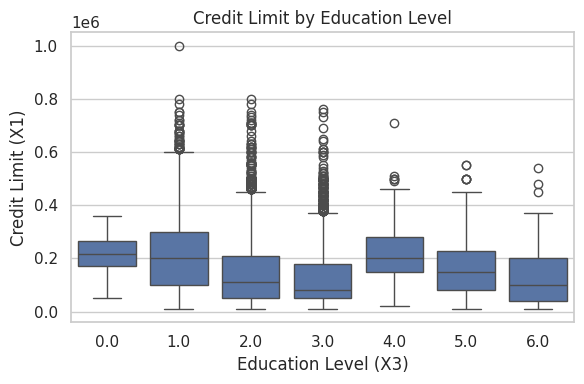

ANOVA F-statistic: 1148.677445552272 | P-value: 0.0


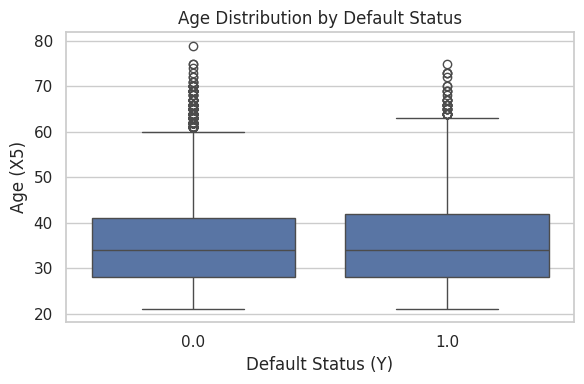

T-test T-statistic: 2.40594177499625 | P-value: 0.016136845890163835


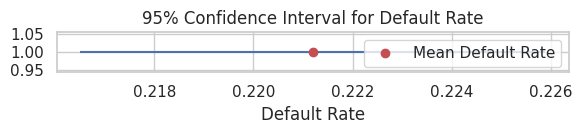

95% Confidence Interval for Default Rate: (0.217, 0.226)


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# 1. ANOVA: Credit Limit by Education Level
plt.figure(figsize=(6, 4))
sns.boxplot(x='X3', y='X1', data=df)
plt.title('Credit Limit by Education Level')
plt.xlabel('Education Level (X3)')
plt.ylabel('Credit Limit (X1)')
plt.tight_layout()
plt.show()

anova_result = stats.f_oneway(
    df[df['X3'] == 1]['X1'],
    df[df['X3'] == 2]['X1'],
    df[df['X3'] == 3]['X1']
)
print("ANOVA F-statistic:", anova_result.statistic, "| P-value:", anova_result.pvalue)


# 2. T-test: Age by Default Status
plt.figure(figsize=(6, 4))
sns.boxplot(x='Y', y='X5', data=df)
plt.title('Age Distribution by Default Status')
plt.xlabel('Default Status (Y)')
plt.ylabel('Age (X5)')
plt.tight_layout()
plt.show()

t_stat, p_value = stats.ttest_ind(
    df[df['Y'] == 1]['X5'],
    df[df['Y'] == 0]['X5']
)
print("T-test T-statistic:", t_stat, "| P-value:", p_value)


# 3. Confidence Interval for Default Rate
default_rate = df['Y'].mean()
n = len(df)
z = 1.96
se = np.sqrt((default_rate * (1 - default_rate)) / n)
ci_lower = default_rate - z * se
ci_upper = default_rate + z * se

plt.figure(figsize=(6, 1.5))
plt.hlines(1, ci_lower, ci_upper, colors='b')
plt.plot(default_rate, 1, 'ro', label='Mean Default Rate')
plt.title('95% Confidence Interval for Default Rate')
plt.xlabel('Default Rate')
plt.legend()
plt.tight_layout()
plt.show()

print(f"95% Confidence Interval for Default Rate: ({ci_lower:.3f}, {ci_upper:.3f})")


**3.Model Building: Random Forest and XGBoost**

3.1 Data Preparation for the Random Forest Model

To model loan default behavior, we first prepared the dataset by cleaning and encoding all relevant features. We excluded the ID column and ensured all financial and demographic features were numerically scaled. The target variable, default payment next month, was relabeled as Y and represented as a binary outcome — where 1 indicates a customer who defaulted and 0 indicates no default.

Our dataset included 30,000 records and 23 predictor variables such as credit limit, age, education, marital status, gender, repayment status (X6–X11), bill amounts (X12–X17), and payment amounts (X18–X23). These features were chosen based on their relevance in previous literature and their correlation with default status during EDA.

We applied an 80/20 train-test split to ensure sufficient data for both training and evaluation. The features were standardized using StandardScaler to improve model performance. Our goal was not only to predict defaults but also to interpret the feature importances derived from the Random Forest model.

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and clean the data
df = pd.read_csv("default of credit card clients.csv", header=1)
df.rename(columns={'default payment next month': 'Y'}, inplace=True)

# Drop ID column and define features/target
X = df.drop(columns=['ID', 'Y'])
y = df['Y']

# Train-test split (80/20) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**3.2 Random Forest Model Evaluation and Feature Insights**

After training the model, we evaluated its performance using standard classification metrics. The model achieved 81.6% accuracy on the test set. Precision and recall were higher for non-defaulters, while recall for defaulters was lower, indicating an imbalance that future work may address.

To better understand what drives default, we extracted the top 10 most important features from the model. The most influential predictors included past repayment behavior (X6 to X11), credit limit (X1), and specific billing/payment trends. These results aligned with the findings from our EDA, reinforcing that repayment history and credit exposure are key signals for financial risk.

The feature importance plot visually confirmed that payment delays and larger bill amounts had the highest contribution toward predicting default.

**Top 10 Important Features with Default (Y)**

This horizontal bar chart displays how strongly the top 10 most important features (as identified by the Random Forest model) are correlated with the target variable Y, which indicates whether a customer defaulted on their credit card payment.

From the plot, we observe that PAY_0 (repayment status in September) shows the strongest positive correlation with default, followed by AGE, and LIMIT_BAL (credit limit). This suggests that customers with delayed payments in recent months (PAY_0), younger age, or lower credit limits are more likely to default.

Interestingly, features like BILL_AMT1 to BILL_AMT6 (bill amounts across the last 6 months) and PAY_AMT1 (payment amount in September) show weaker or even negative correlations, indicating they are less predictive or inversely related.

This plot bridges model-based importance (from Random Forest) with statistical relationships (correlation), offering a balanced view of what features not only drive predictions but also correlate directly with the outcome.

Accuracy: 0.8116666666666666
ROC AUC Score: 0.7506710534357693

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



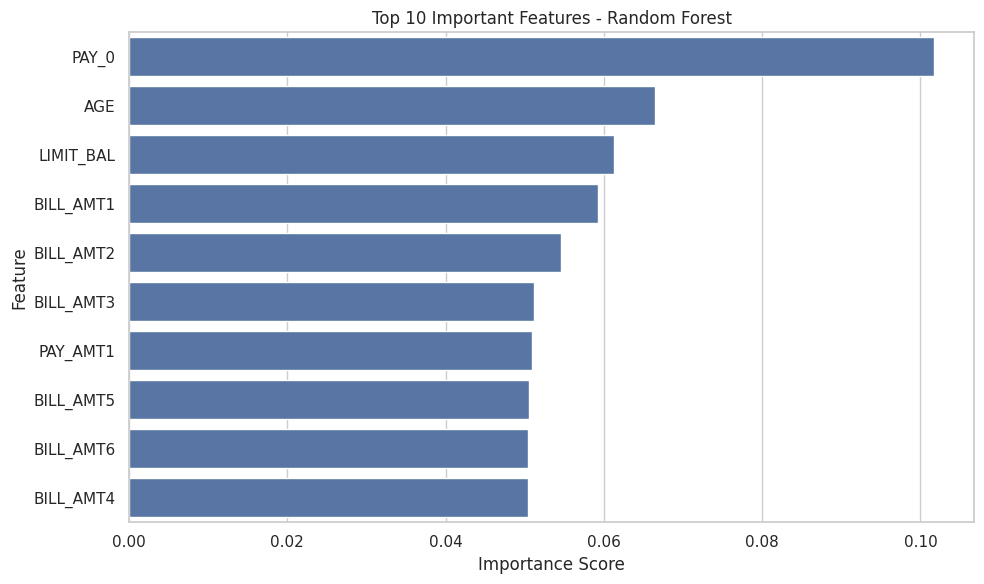

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


**Random Forest Model Evaluation and Discussion**

The Random Forest model achieved an accuracy of approximately 81.17% and an ROC AUC score of 0.75, indicating a good ability to distinguish between defaulters and non-defaulters. The classification report reveals that the model performs very well in identifying non-defaulters (class 0), with a precision of 0.84, recall of 0.94, and F1-score of 0.89. However, its performance in identifying defaulters (class 1) is relatively weaker, with a precision of 0.63, recall of 0.36, and F1-score of 0.46, meaning it misses a large portion of actual defaulters. Overall, while the model is strong in predicting who will not default, it requires improvement—such as handling class imbalance—to better capture defaulters.

**Correlation of Top 10 Important Features with Default (Y)**

This horizontal bar chart illustrates how strongly the top 10 most important features (as selected by the Random Forest model) correlate with the target variable Y (whether a customer defaulted).

At the top of the chart, we see PAY_0, which has the strongest positive correlation with defaulting, meaning delayed payments in September are a key signal of risk. AGE and LIMIT_BAL follow, but both show a negative correlation, indicating that younger individuals or those with lower credit limits may be more prone to default.

The rest of the features—mostly BILL_AMT and PAY_AMT values from recent months—show weaker negative correlations, suggesting a slight trend where lower bill amounts or lower payments are associated with higher risk of default.

This visualization bridges feature importance from the model and their real statistical relationship with defaults, helping to explain why the model considers these features important.









<ipython-input-39-9a01bef5e99e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corrs.values, y=top_corrs.index, palette='coolwarm')


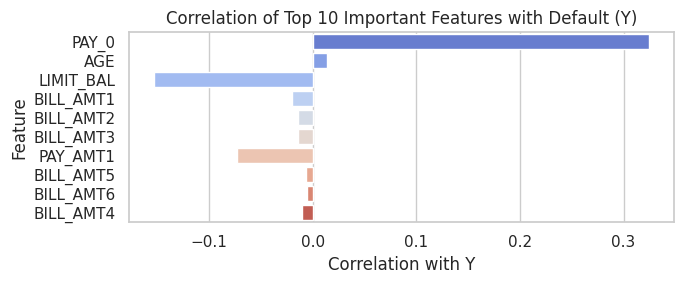

In [39]:
# Add target column to original dataframe
df_features_only = df.drop(columns=['ID'])
correlation_with_y = df_features_only.corr()['Y'].sort_values(key=abs, ascending=False)

# Filter only top 10 important features (from Random Forest)
top_10_features = importances.head(10).index
top_corrs = correlation_with_y[top_10_features]

# Plot
plt.figure(figsize=(7, 3))
sns.barplot(x=top_corrs.values, y=top_corrs.index, palette='coolwarm')
plt.title("Correlation of Top 10 Important Features with Default (Y)")
plt.xlabel("Correlation with Y")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


**Top 5 Positive & Negative Correlated Features with Y**

This horizontal bar chart displays the 5 most positively and 5 most negatively correlated features with the target variable Y (Default).

On the positive side, the features PAY_0 to PAY_5 show strong positive correlations, meaning customers who had delayed payments in recent months are more likely to default. These features reflect the repayment status from recent months, and their rising correlation values highlight that delinquency is a key driver of default.

On the negative side, features like LIMIT_BAL and the PAY_AMT series (payment amounts from different months) are negatively correlated with default. This indicates that higher credit limits and greater past payments are associated with lower default risk, which is logically consistent with good financial behavior.

Together, this graph gives a clear picture of which behaviors (e.g., missed payments) increase risk, and which (e.g., higher payments, higher limits) reduce it.


<ipython-input-40-d6b9656fd97d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined.values, y=combined.index, palette='Spectral')


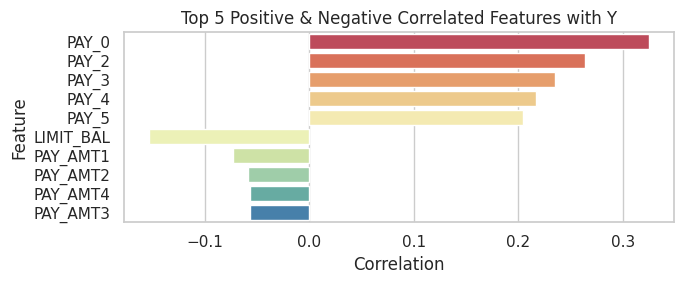

In [40]:
# Drop target itself from correlation series
cor_sorted = correlation_with_y.drop('Y')

# Get top 5 positive and top 5 negative
top_pos = cor_sorted.sort_values(ascending=False).head(5)
top_neg = cor_sorted.sort_values(ascending=True).head(5)

# Combine
combined = pd.concat([top_pos, top_neg])

# Plot
plt.figure(figsize=(7, 3))
sns.barplot(x=combined.values, y=combined.index, palette='Spectral')
plt.title("Top 5 Positive & Negative Correlated Features with Y")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


**Planned Additional Analyses**

In the planned additional analyses, I want to go a bit deeper to understand which features are truly influencing the prediction of defaults. After using Random Forest and XGBoost models, I plan to use SHAP (SHapley Additive Explanations) values. SHAP will help me clearly see how much each feature is contributing to a person defaulting or not. This will make the models more interpretable. I also want to perform cross-validation to check if the model is performing consistently on different parts of the dataset. Additionally, I may explore how some features interact with each other, like whether age and payment history together influence default more than individually. These additional steps will help improve my model and give a clearer picture of which features are most important.
